In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_csv("ecommerce_sales_analysis.csv") 
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [3]:
# For simpler calculation, let's add up all the sales month and create a single column.

df["Total sales"] =  df.iloc[:, 6:18].sum(axis=1)
df['Total revenue'] = df['Total sales'] * df['price']

# Identify the top / low performing category and the corresponding products

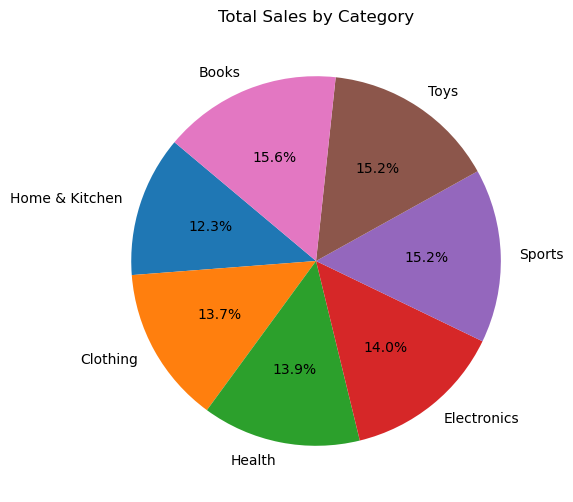

In [4]:
max_sales_by_category = df.groupby('category')['Total sales'].sum().sort_values()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(max_sales_by_category, labels=max_sales_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Category')
plt.show()

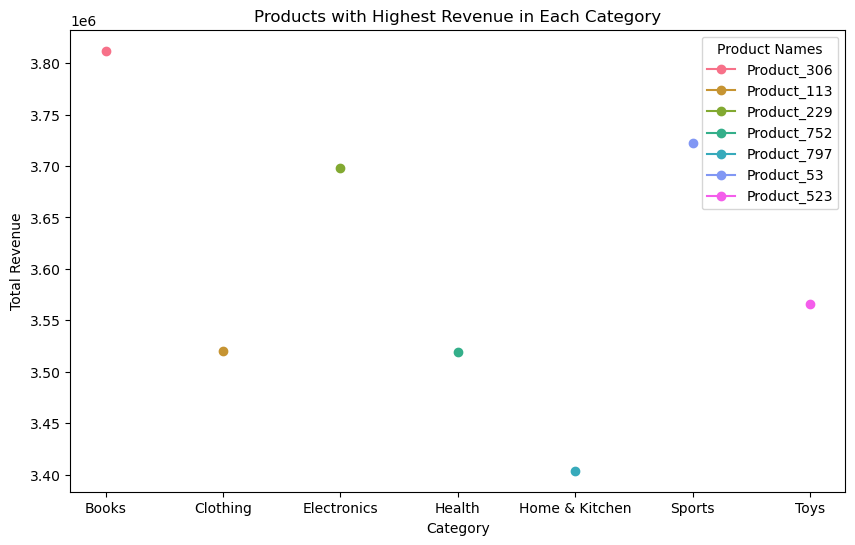

In [5]:
products_with_max_revenue = df.loc[df.groupby('category')['Total revenue'].idxmax()]

# Plotting
plt.figure(figsize=(10, 6))

# Use seaborn color palette to ensure different colors for each product
colors = sns.color_palette('husl', len(products_with_max_revenue))

# Creating a line plot
for i, (index, row) in enumerate(products_with_max_revenue.iterrows()):
    plt.plot(row['category'], row['Total revenue'], marker='o', color=colors[i], label=row['product_name'])

# Adding labels
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.title('Products with Highest Revenue in Each Category')

# Adding legend
plt.legend(title='Product Names')
plt.show()

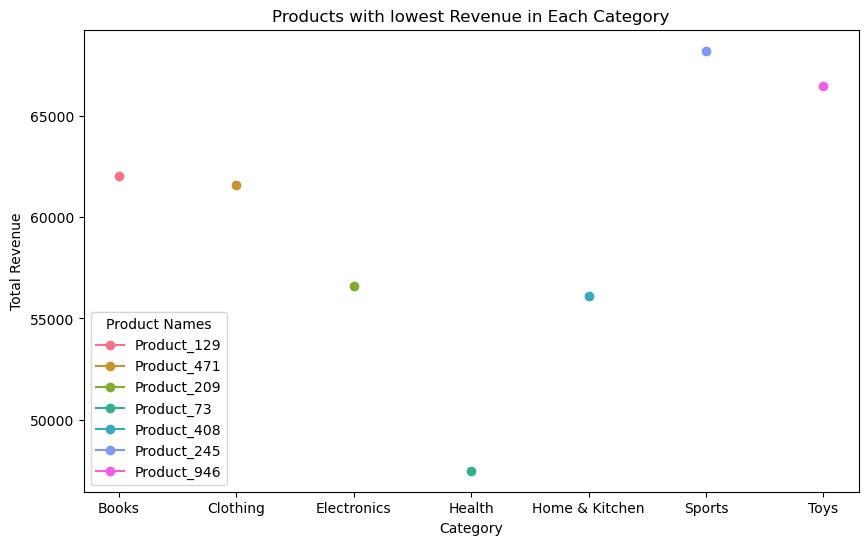

In [6]:
products_with_min_revenue = df.loc[df.groupby('category')['Total revenue'].idxmin()]

# Plotting
plt.figure(figsize=(10, 6))

# Use seaborn color palette to ensure different colors for each product
colors = sns.color_palette('husl', len(products_with_min_revenue))

# Creating a line plot
for i, (index, row) in enumerate(products_with_min_revenue.iterrows()):
    plt.plot(row['category'], row['Total revenue'], marker='o', color=colors[i], label=row['product_name'])

# Adding labels
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.title('Products with lowest Revenue in Each Category')

# Adding legend
plt.legend(title='Product Names')
plt.show()

# Is there any relationship between Price and Review score ?

In [7]:
print(scipy.stats.pearsonr(df['price'], df['review_score'])) # Pearson's r
print(scipy.stats.spearmanr(df['price'], df['review_score'])) # Spearman's rho
print(scipy.stats.kendalltau(df['price'], df['review_score']))  # Kendall's tau

PearsonRResult(statistic=0.028959785424319144, pvalue=0.3602780980020673)
SignificanceResult(statistic=0.02892267758634824, pvalue=0.36089417130225176)
SignificanceResult(statistic=0.01981408575798858, pvalue=0.3539857817218873)



Regression Analysis Summary:
                                 OLS Regression Results                                
Dep. Variable:           review_score   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.657
Method:                 Least Squares   F-statistic:                              1917.
Date:                Thu, 01 Aug 2024   Prob (F-statistic):                   1.22e-234
Time:                        01:42:32   Log-Likelihood:                         -2060.7
No. Observations:                1000   AIC:                                      4123.
Df Residuals:                     999   BIC:                                      4128.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

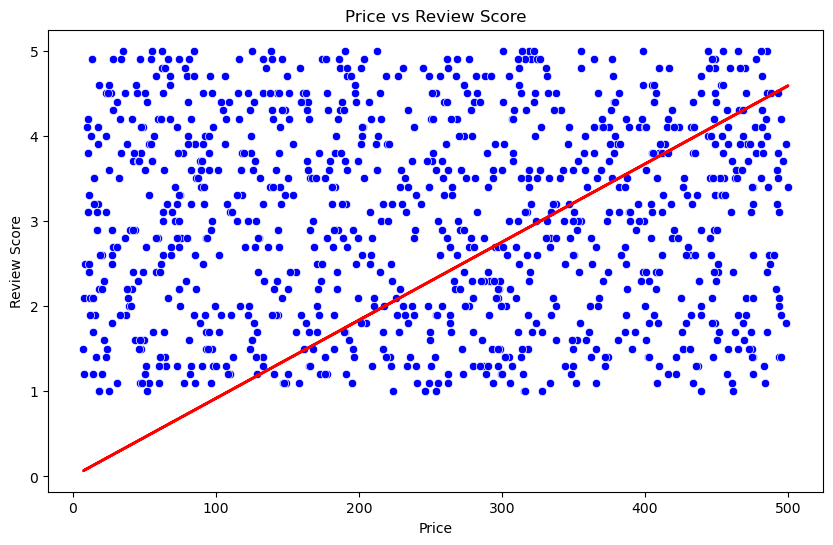

In [8]:
X = df['price']
Y = df['review_score']
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print("\nRegression Analysis Summary:")
print(model.summary())

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='review_score', data=df, color='blue')
plt.plot(df['price'], predictions, color='red', linewidth=2)
plt.title('Price vs Review Score')
plt.xlabel('Price')
plt.ylabel('Review Score')
plt.show()

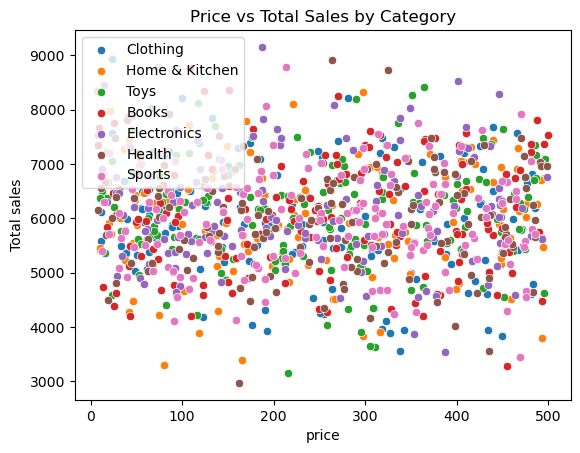

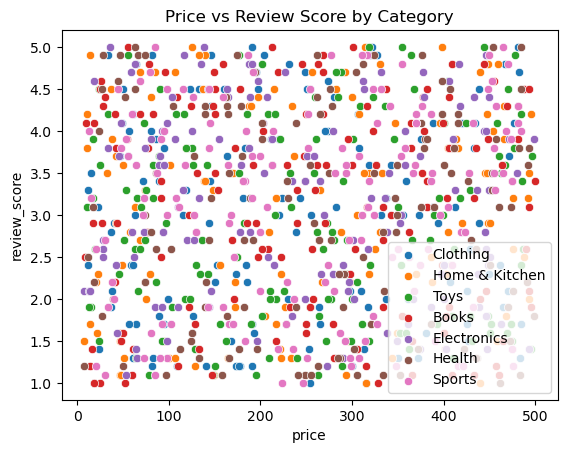

In [9]:
categories = df['category'].unique()

for category in categories:
    df_category = df[df['category'] == category]
    sns.scatterplot(x='price', y='Total sales', data=df_category, label=category)
plt.title('Price vs Total Sales by Category')
plt.legend()
plt.show()

for category in categories:
    df_category = df[df['category'] == category]
    sns.scatterplot(x='price', y='review_score', data=df_category, label=category)
plt.title('Price vs Review Score by Category')
plt.legend()
plt.show()

               review_score  Total sales  Total revenue
review_score       1.000000    -0.018186       0.027932
Total sales       -0.018186     1.000000       0.256792
Total revenue      0.027932     0.256792       1.000000


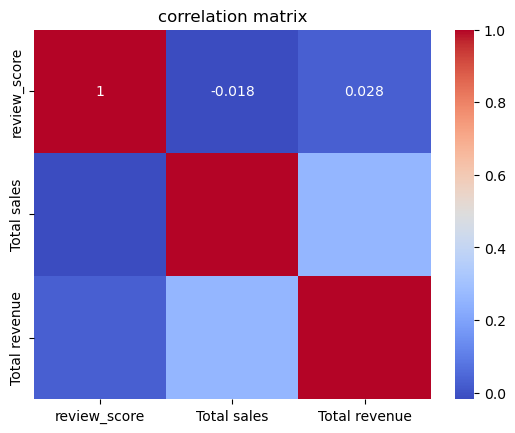

In [10]:
correlation_mat = df[['review_score', 'Total sales', 'Total revenue']].corr()
print(correlation_mat)
sns.heatmap(correlation_mat, annot = True, cmap = 'coolwarm')
plt.title("correlation matrix")
plt.show()

The correlation coefficients and the graphs indicate that there is no relationship between review score VS total sales VS total revenue

# Discover seasonal trends and patterns 

In [11]:
sales_month_columns = ['sales_month_1' , 'sales_month_2', 'sales_month_3', 
                       'sales_month_4', 'sales_month_5', 'sales_month_6', 'sales_month_7',
                       'sales_month_8', 'sales_month_9', 'sales_month_10', 'sales_month_11',
                       'sales_month_12']

# Group by category and sum across sales month columns
grouped_sum = df.groupby('category')[sales_month_columns].sum()
grouped_sum

,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
category,,,,,,,,,,,,
Books,77932,80079,76998,74699,79051,76644,79114,78108,77211,83504,76557,78332
Clothing,60966,67911,76796,70088,61643,63123,66105,74422,72675,68806,71683,72318
Electronics,76347,72472,70708,73158,72169,70060,72223,65754,69914,70148,68148,64019
Health,67644,67432,67602,72925,69178,63926,75256,69126,64581,72613,72500,71631
Home & Kitchen,57844,57252,62667,65388,59766,63169,60129,65042,58135,64876,66281,61592
Sports,77737,82244,75109,74287,73467,75641,77082,73912,79209,80187,74270,73226
Toys,79836,80271,76859,73278,71920,79090,77102,78205,70209,74664,76399,79268


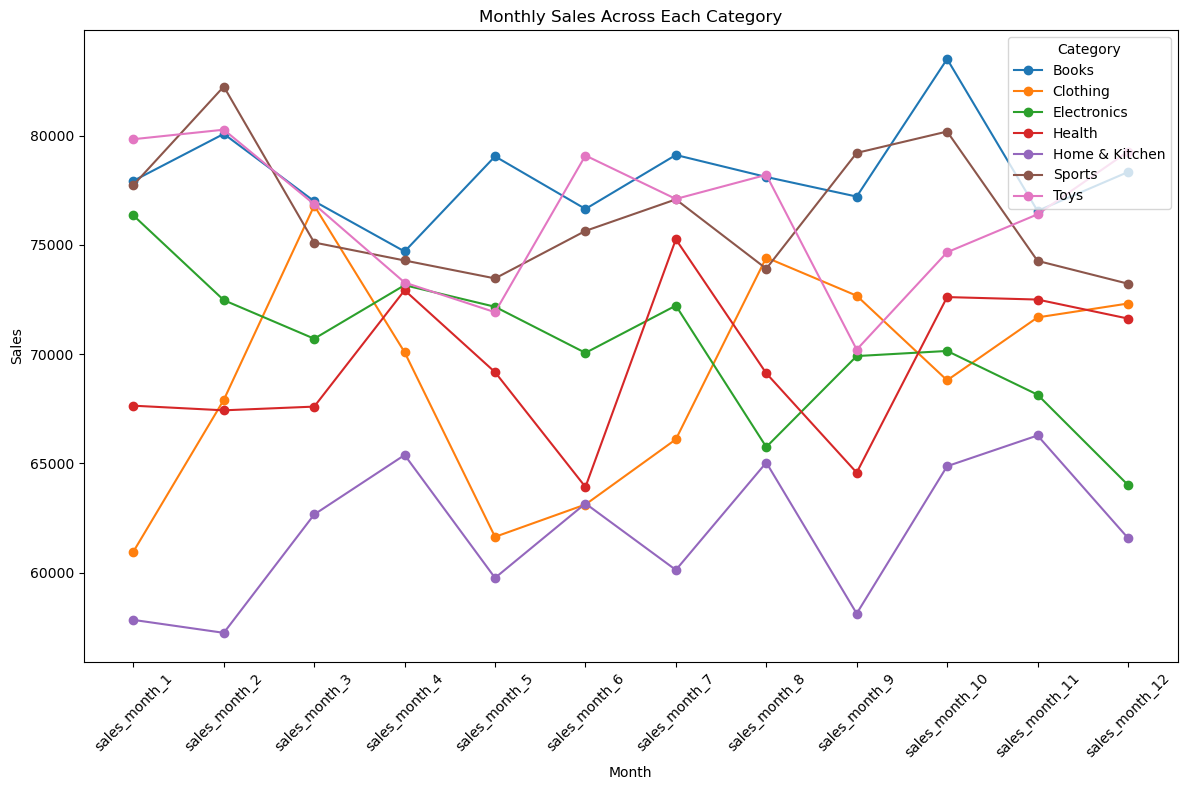

In [12]:
# Reset index to move 'category' from index to a column
grouped_sum = grouped_sum.reset_index()

# Melt the DataFrame to long format
df_melted = grouped_sum.melt(id_vars=['category'], var_name='month', value_name='sales')

# Create a line plot
plt.figure(figsize=(12, 8))

# Plot each category's sales data
for category in df_melted['category'].unique():
    category_data = df_melted[df_melted['category'] == category]
    plt.plot(category_data['month'], category_data['sales'], marker='o', label=category)

# Add titles and labels
plt.title('Monthly Sales Across Each Category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Category')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
  
plt.show()

# Analysis Customer satisfaction based Review score

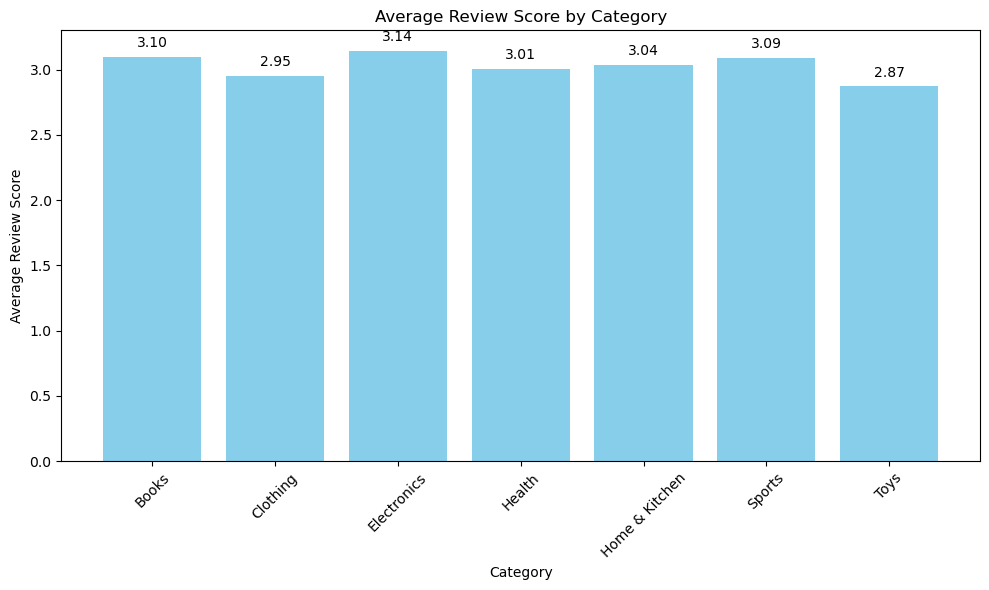

In [13]:
# Calculate average review score per category
avg_review_score = df.groupby('category')['review_score'].mean().reset_index()

# Rename columns for clarity
avg_review_score.columns = ['category', 'avg_review_score']

# Create the bar plot
plt.figure(figsize=(10, 6))

# Plot bars
plt.bar(avg_review_score['category'], avg_review_score['avg_review_score'], color='skyblue')

# Add titles and labels
plt.title('Average Review Score by Category')
plt.xlabel('Category')
plt.ylabel('Average Review Score')

# Add value labels on top of bars
for i, value in enumerate(avg_review_score['avg_review_score']):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom')

# Rotate x-ticks for better readability if needed
plt.xticks(rotation=45)

# Show the plot with tight layout
plt.tight_layout()

# Display the plot
plt.show()

In [14]:
avg_review_score

,category,avg_review_score
0,Books,3.096753
1,Clothing,2.952143
2,Electronics,3.143478
3,Health,3.005036
4,Home & Kitchen,3.035200
5,Sports,3.091503
6,Toys,2.870861


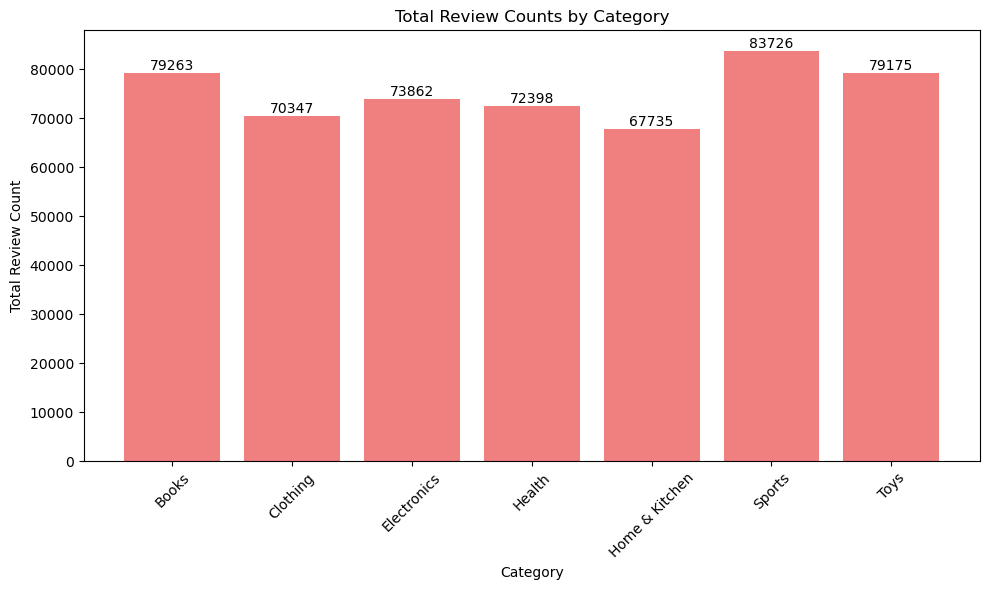

In [15]:
tot_review_counts = df.groupby('category')['review_count'].sum().reset_index()
tot_review_counts

# Rename columns 
tot_review_counts.columns = ['category', 'total_review_count']

# Create the bar plot
plt.figure(figsize=(10, 6))

# Plot bars
plt.bar(tot_review_counts['category'], tot_review_counts['total_review_count'], color='lightcoral')

# Add titles and labels
plt.title('Total Review Counts by Category')
plt.xlabel('Category')
plt.ylabel('Total Review Count')

# Add value labels on top of bars
for i, value in enumerate(tot_review_counts['total_review_count']):
    plt.text(i, value + 5, f'{value}', ha='center', va='bottom')

# Rotate x-ticks for better readability if needed
plt.xticks(rotation=45)

# Show the plot with tight layout
plt.tight_layout()

# Display the plot
plt.show()